# Mira Saldanha and Priyal Patel - Swamphacks VIII

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# data publicly available at https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data
# it comes as csv, must be converted to json

In [176]:
def Default():
    #default will show temps in Gnv, 2020, before prompting for input
    data2020 = info[info['YEAR'] == 2020]
    
    daysList = range(len(data2020))
    meansList = data2020['meanTemp']

    plt.plot(daysList,meansList)
    plt.title('Mean Temepratures in Gainesville, FL, in 2020')
    plt.xlabel('Day of 2020')
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def CityStr(cityNum):
    if cityNum == 1:
        cityAb = 'tam'
        city = 'Tampa'
    elif cityNum == 2:
        cityAb = 'jax'
        city = 'Jacksonville'
    elif cityNum == 3:
        cityAb = 'mia'
        city = 'Miami'
    elif cityNum == 4:
        cityAb = 'orl'
        city = 'Orlando'
    elif cityNum == 5:
        cityAb = 'gnv'
        city = 'Gainesville'

    return cityAb+'_weather.json', city
    
def YearValid(year):
    # checks to see if list is empty, for some years it is
    data = info[info['YEAR'] == year]
    if data.empty:
        return False
    else:
        return True
    
def YearSelection(year):
    #returns subset of main DF with data from particular year
    data = info[info['YEAR'] == year]
    daysList = range(len(data))
    meansList = data['meanTemp']
    return data, daysList, meansList
    
    
def MonthConverter(month):
    if month == 1:
        return 'January'
    elif month == 2:
        return 'February'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'

def ShowYear(year, city):
    data, daysList, meansList = YearSelection(year)
    
    plt.plot(daysList,meansList)
    plt.title('Mean Temepratures in ' + city + ', FL, in ' + str(year))
    plt.xlabel('Day of ' + str(year))
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def ShowHighLow(year, city):
    data, daysList, meansList = YearSelection(year)
    
    max = meansList.max()
    min = meansList.min()
    print('The highest mean temperature in ' + city +' in ' + str(year) + ' was ' + str(max) + ' °F')
    print('The lowest mean temperature in ' + city + ' in ' + str(year) + ' was ' + str(min) + ' °F')
    
def MonthSelection(month, year): 
    #month is number 1 to 12
    data, daysList, meansList = YearSelection(year)
    
    data = data[data['MONTH'] == month]
    daysList = range(len(data))
    meansList = data['meanTemp']
    
    return data, daysList, meansList

  
def ShowMonth(month, year, city):
    data, daysList, meansList = MonthSelection(month, year)
    
    plt.plot(daysList,meansList)
    plt.title('Mean Temperatures in ' + city + ', FL, in ' + MonthConverter(month) + ', ' + str(year))
    plt.xlabel('Day of ' + MonthConverter(month))
    plt.ylabel('Mean Temp in Fahrenheit')
    plt.show()
    
def MonthHighLow(month, year, city):
    data, daysList, meansList = MonthSelection(month, year)
    
    max = meansList.max()
    min = meansList.min()
    print('The highest mean temperature in ' + city + ' in ' + MonthConverter(month) 
          + ', ' + str(year) + ' was ' + str(max) + ' °F')
    print('The lowest mean temperature in ' + city + ' in ' + MonthConverter(month) 
          + ', ' + str(year) + ' was ' + str(min) + ' °F')
    

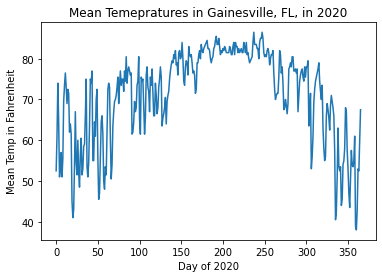


Welcome to Weather Records in Fl !

Select a city by typing in a number. To exit, enter 0
 1. Tampa 
 2. Jacksonville 
 3. Miami 
 4. Orlando 
 5. Gainesville
1
Please enter a year from 1960 to 2020. To exit, enter. 0
2012
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
1


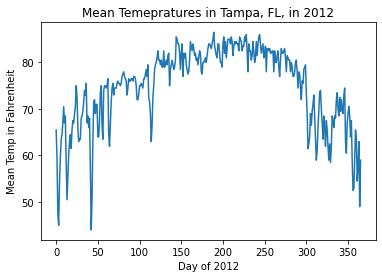


Select a city by typing in a number. To exit, enter 0
 1. Tampa 
 2. Jacksonville 
 3. Miami 
 4. Orlando 
 5. Gainesville
2
Please enter a year from 1960 to 2020. To exit, enter. 0
2005
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
2
The highest mean temperature in Jacksonville in 2005 was 87.0 °F
The lowest mean temperature in Jacksonville in 2005 was 37.0 °F

Select a city by typing in a number. To exit, enter 0
 1. Tampa 
 2. Jacksonville 
 3. Miami 
 4. Orlando 
 5. Gainesville
5
Please enter a year from 1960 to 2020. To exit, enter. 0
2003
Enter a number to continue:
 1. Show mean temperatures for full year
 2. See high and low mean temperatures for this year
 3. See a specific month of this year
2
The highest mean temperature in Gainesville in 2003 was 83.5 °F
The lowest mean temperature in Gainesville in 2003 was 31.0 °F

Select a city by typing in a number. To exi

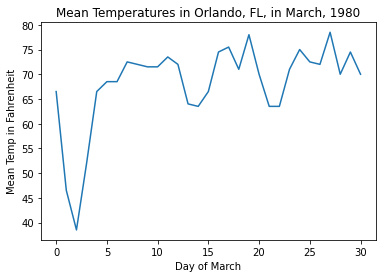


Select a city by typing in a number. To exit, enter 0
 1. Tampa 
 2. Jacksonville 
 3. Miami 
 4. Orlando 
 5. Gainesville
0


In [181]:
#user menu

Default()
print()
year = 2020
print("Welcome to Weather Records in Fl !")

while year != 0:
    
    try: 
        print("\nSelect a city by typing in a number. To exit, enter 0")
        print(" 1. Tampa \n 2. Jacksonville \n 3. Miami \n 4. Orlando \n 5. Gainesville")
        city  = int(input())
    
        if city == 0:
            break
        if city > 5 or city < 1:
            print("Invalid selection. Please try again.")
            continue
    
    except ValueError:
        print('Please enter a number on the city menu.')

    fileName, cityName = CityStr(city)
    dataset = json.load(open(fileName))
    info = pd.DataFrame(dataset)
    info = info[info['meanTemp'] != -99.9] #remove bad readings that show up as -99.9
    
    try:
        print('Please enter a year from 1960 to 2020. To exit, enter. 0')
        year = int(input()) 
        
    except ValueError:
        print('Sorry. Invalid option number. Please try again.')
        continue
    
    if (year < 1960 or year > 2020) & year != 0:
            print('Please enter a valid year.')
            continue
        
    if year != 0:   
        if YearValid(year):
            #keep going, ask for what next
            print('Enter a number to continue:')
            print(' 1. Show mean temperatures for full year')
            print(' 2. See high and low mean temperatures for this year')
            print(' 3. See a specific month of this year')
           
            menu = int(input())
            if menu == 1:
                ShowYear(year, cityName)
            elif menu == 2:
                ShowHighLow(year, cityName)
            elif menu == 3:
                print("Please enter the number of the month you wish to see (ex: March = 3)")
                month = int(input())
                print()
                print("Enter a number to continue:")
                print(" 1. Show mean temperatures for full month")
                print(" 2. See high and low mean temperatures for this month")
              
                menu = int(input())
                if menu == 1:
                    ShowMonth(month, year, cityName)
                elif menu == 2:
                    MonthHighLow(month, year, cityName)
                else:
                    print("Invalid entry. Please try again.")
                
            else:
                print("Invalid entry. Please try again.")
            
        else:
            print("Not enough data for this year. Please try again") 
            print()
            continue